# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

Dataset diperoleh dari situs Kaggle.com dengan judul **Ship Performance Clustering Datase** dan dapat dilihat <a href="https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/data" target="_blank">disini</a>. Dataset terdiri atas 18 kolom dan 2736 baris. Dataset ini memiliki 13 fitur numerik dan 5 fitur kategorik.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score

import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [38]:
df = pd.read_csv("Ship_Performance_Dataset.csv")
display(df)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2024-06-02,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,2024-06-16,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,NaN,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,2024-06-23,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### Struktur Data

In [39]:
df.shape

(2736, 18)

In [40]:
df.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [41]:
df.dtypes

Date                        object
Ship_Type                   object
Route_Type                  object
Engine_Type                 object
Maintenance_Status          object
Speed_Over_Ground_knots    float64
Engine_Power_kW            float64
Distance_Traveled_nm       float64
Draft_meters               float64
Weather_Condition           object
Cargo_Weight_tons          float64
Operational_Cost_USD       float64
Revenue_per_Voyage_USD     float64
Turnaround_Time_hours      float64
Efficiency_nm_per_kWh      float64
Seasonal_Impact_Score      float64
Weekly_Voyage_Count          int64
Average_Load_Percentage    float64
dtype: object

In [42]:
print(df.columns)

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')


### Missing Values

In [43]:
df.isnull().sum()

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

Terdapat missing values sebanyak 136 buah pada kolom kategorik yaitu 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', dan 'Weather_Condition'.

### Distribusi dan Korelasi

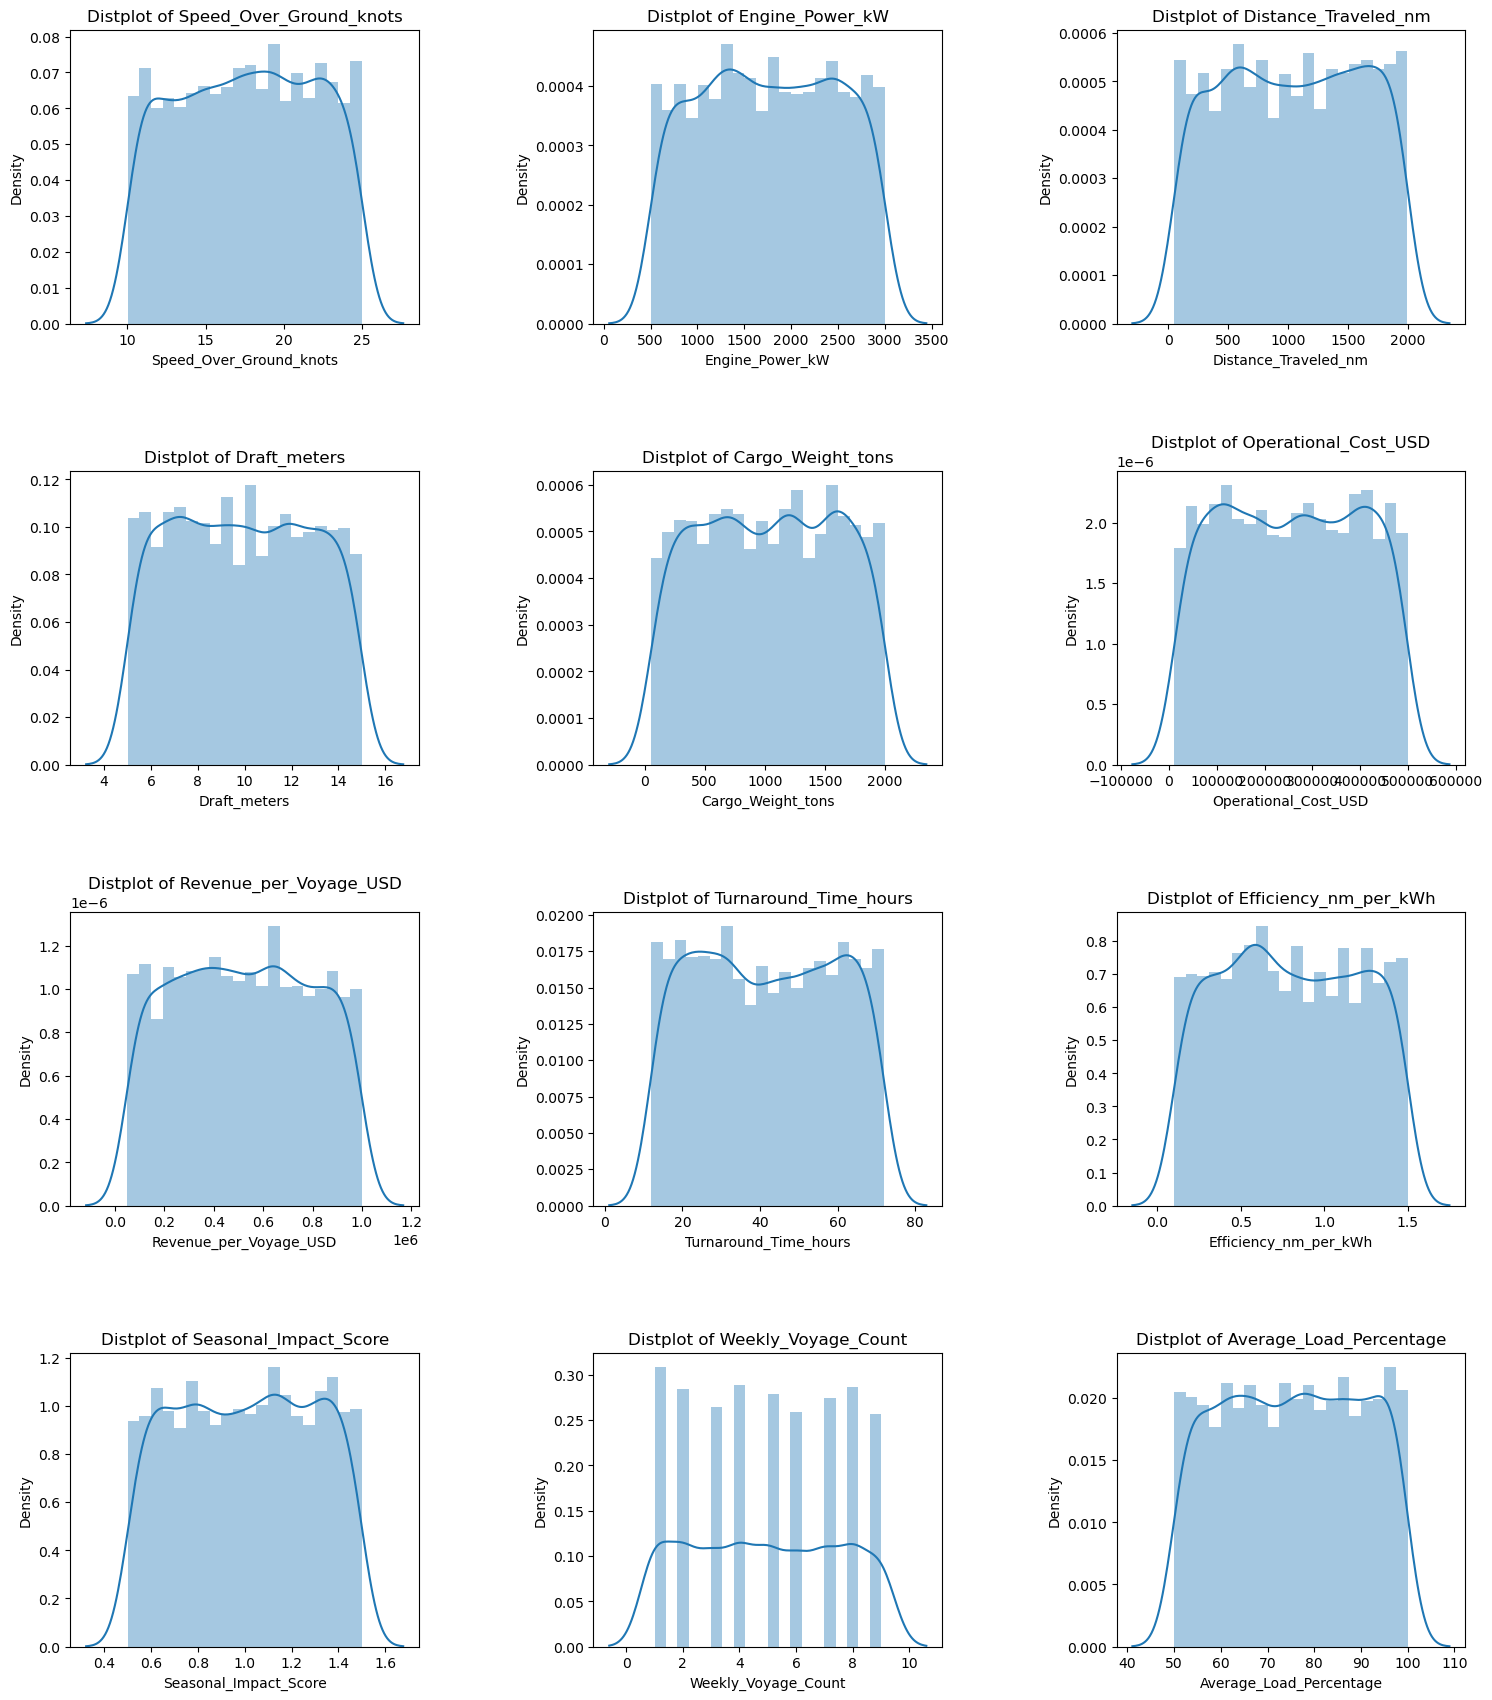

In [44]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(1, figsize=(18, 21)) 
n = 0

for col in numeric_df:
    n += 1
    plt.subplot(4, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[col], bins=20, kde=True) 
    plt.title(f'Distplot of {col}')
    
plt.show()

 Sebagian besar fitur menunjukkan pola distribusi mendekati distribusi normal. Beberapa variabel seperti Speed Over Ground, Draft, dan Efficiency per kWh memiliki distribusi yang relatif simetris, sementara variabel seperti Operational Cost dan Revenue per Voyage menunjukkan penyebaran yang luas. Selain itu, variabel Weekly Voyage Count memiliki distribusi discrete.

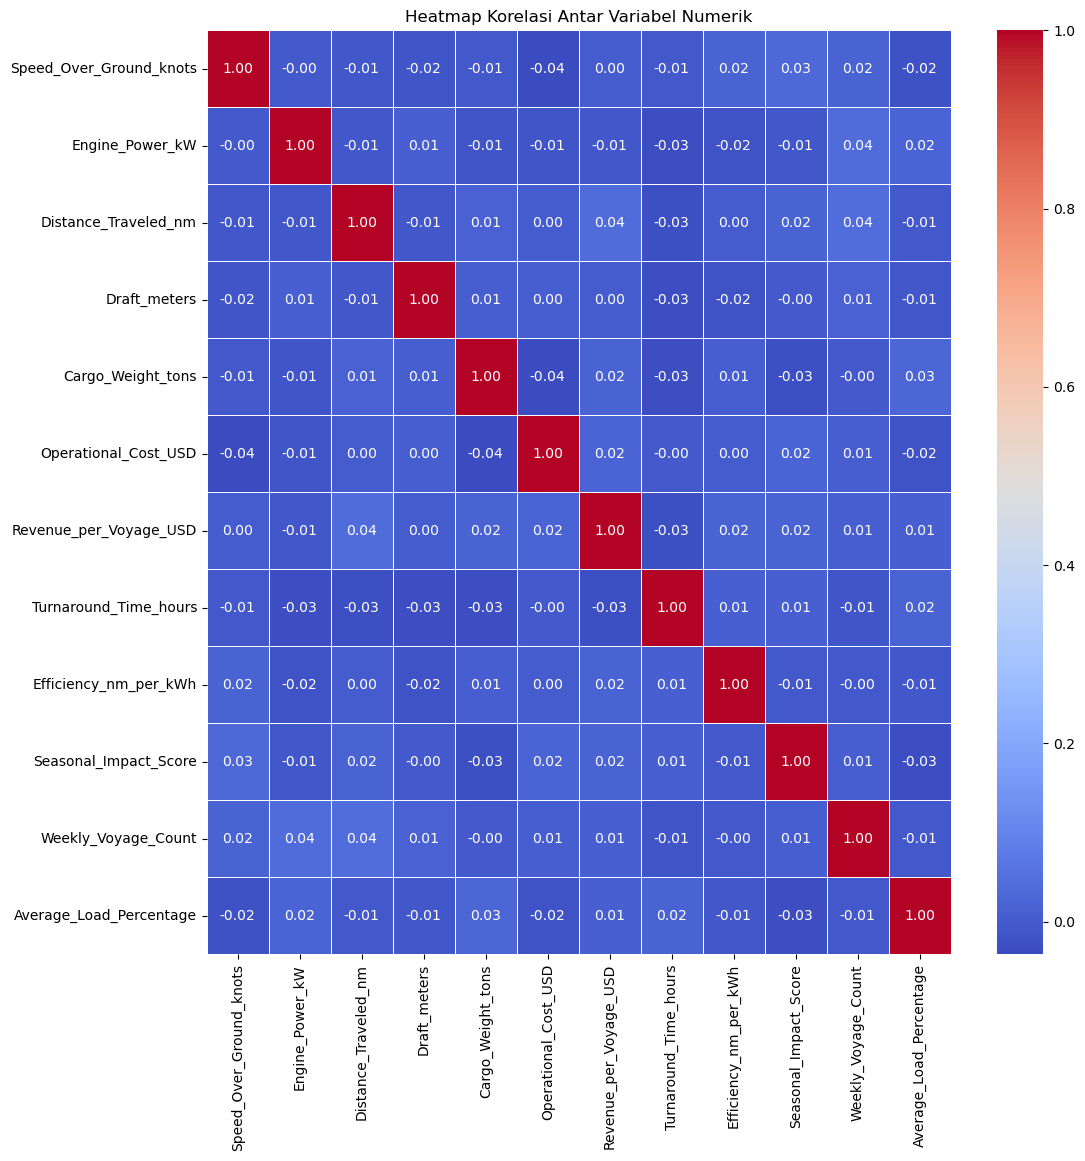

In [45]:
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

Berdasarkan heatmap korelasi antar variabel numerik, terlihat bahwa tidak ada korelasi yang signifikan antara variabel-variabel dalam dataset, karena hampir semua nilai korelasi mendekati nol. Beberapa variabel memiliki korelasi positif dengan beberapa fitur lainnya.

### Visualisasi Data

**Distribusi Fitur Kategorik**

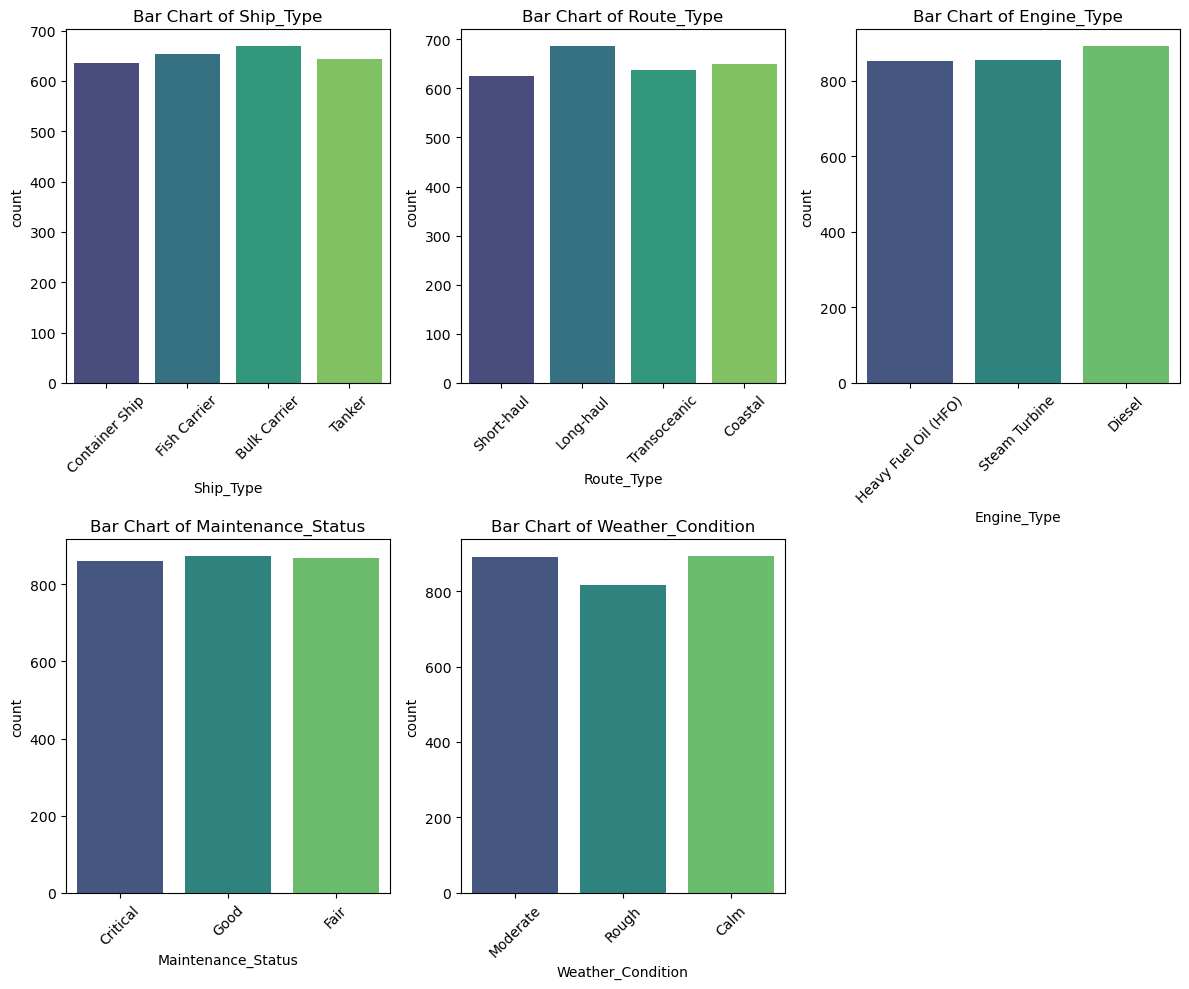

In [46]:
categorical_columns = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status','Weather_Condition']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, i) 
    sns.countplot(data=df, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f'Bar Chart of {col}')

plt.tight_layout()
plt.show()


Dari visualisasi bar chart pada fitur kategorik di atas, terlihat untuk tipe kapal, tipe mesin dan status maintenance distribusi setiap labelnya hampir sama sehingga tidak terdapat perbedaan jumlah label yang signifikan. Hal yang sama dengan tipe rute dan kondisi cuaca, tetapi terlihat bahwa label *long haul* memiliki jumlah yang cukup banyak dibandingkan dengan label lainnya. Pada fitur kondisi cuaca, didominasi dengan tipe cuaca **calm** dan **moderate**, dengan kondisi cuaca **rough** sedikit lebih rendah, yang dapat berpengaruh pada efisiensi perjalanan kapal

**Distribusi Biaya Operasional**

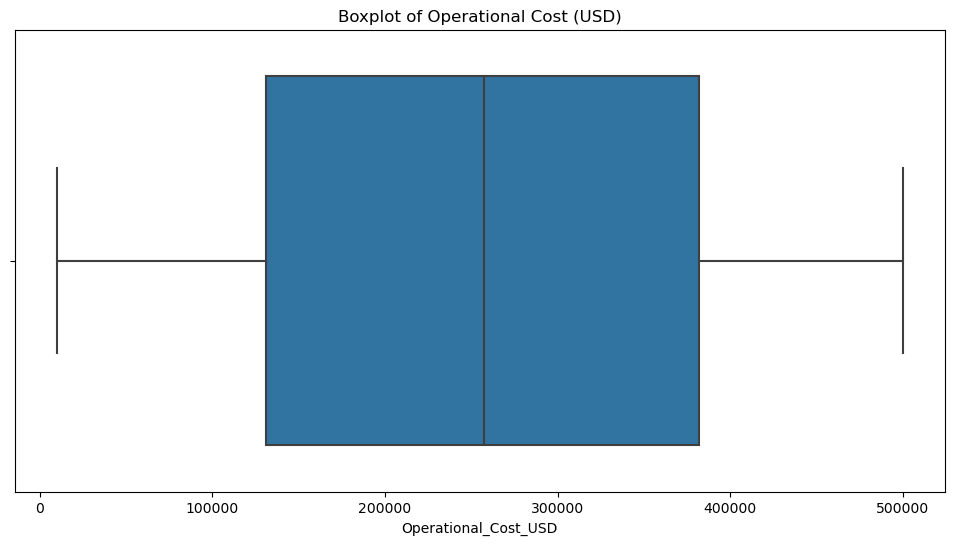

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Operational_Cost_USD'])
plt.title('Boxplot of Operational Cost (USD)')
plt.show()

Boxplot biaya operasional *(Operational_Cost_USD)* di atas menunjukkan distribusi pengeluaran operasional kapal. Median berada di tengah distribusi, menandakan bahwa separuh kapal memiliki biaya operasional yang seimbang. Rentang interkuartil (IQR) yang luas mengindikasikan adanya perbedaan signifikan dalam biaya operasional antar kapal. Whiskers yang panjang menunjukkan variasi biaya yang besar, tetapi tidak ada outlier, yang berarti tidak ada kapal dengan biaya operasional yang sangat ekstrem dibandingkan yang lain. Dapat disimpulkan bahwa biaya operasional kapal relatif konsisten pada dataset.

**Distribusi Jarak Tempuh berdasarkan Tipe Kapal**

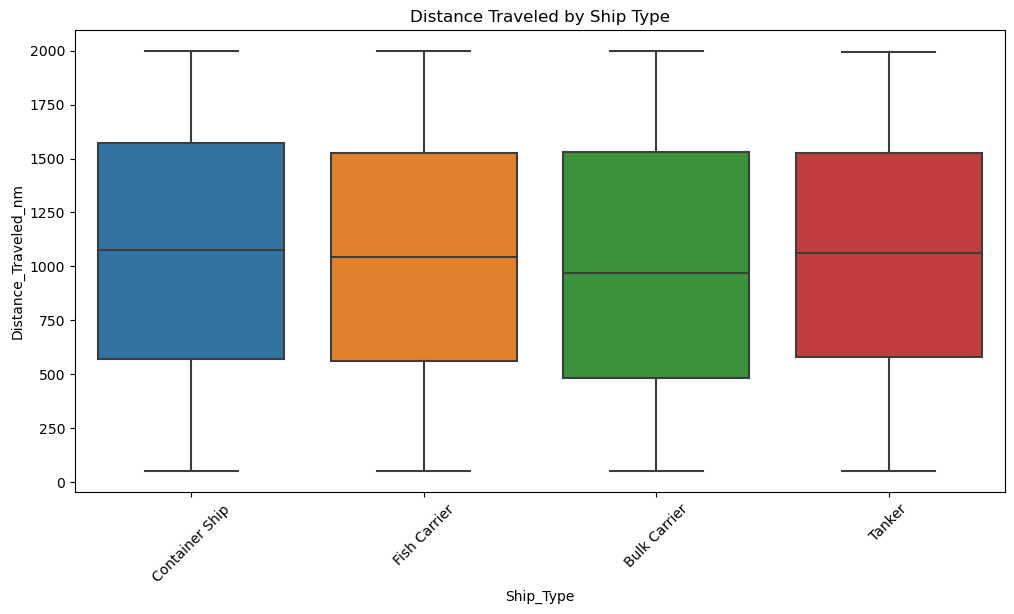

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Ship_Type', y='Distance_Traveled_nm', data=df)
plt.xticks(rotation=45)
plt.title('Distance Traveled by Ship Type')
plt.show()

Boxplot di atas menunjukkan distribusi *Distance Traveled (nm)* berdasarkan *Ship Type*. Semua jenis kapal memiliki rentang perjalanan yang hampir serupa, dengan nilai minimum mendekati nol dan maksimum sekitar 2000 nm. Median perjalanan untuk setiap tipe kapal juga relatif mirip, menunjukkan bahwa tidak ada perbedaan signifikan dalam pola perjalanan berdasarkan jenis kapal. 

**Distribusi Jumlah Perjalanan Kapal per Minggu**

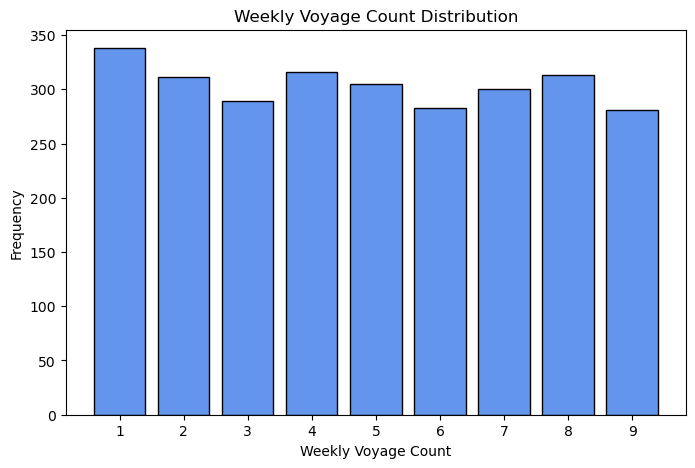

In [49]:
weekly_counts = df['Weekly_Voyage_Count'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(weekly_counts.index, weekly_counts.values, color='cornflowerblue', edgecolor='black')

plt.title('Weekly Voyage Count Distribution')
plt.xlabel('Weekly Voyage Count')
plt.ylabel('Frequency')
plt.xticks(ticks=weekly_counts.index)  
plt.show()

Histogram di atas menunjukkan distribusi jumlah perjalanan kapal per minggu, frekuensi perjalanan kapal yang relatif seimbang sekitar 1 hingga 9 perjalanan per minggu, dan berkisar antara 260 hingga 340 kejadian. Dapat disimpulkan bahwa pola perjalanan kapal cenderung stabil.

**Pairplot antar Fitur Numerik**

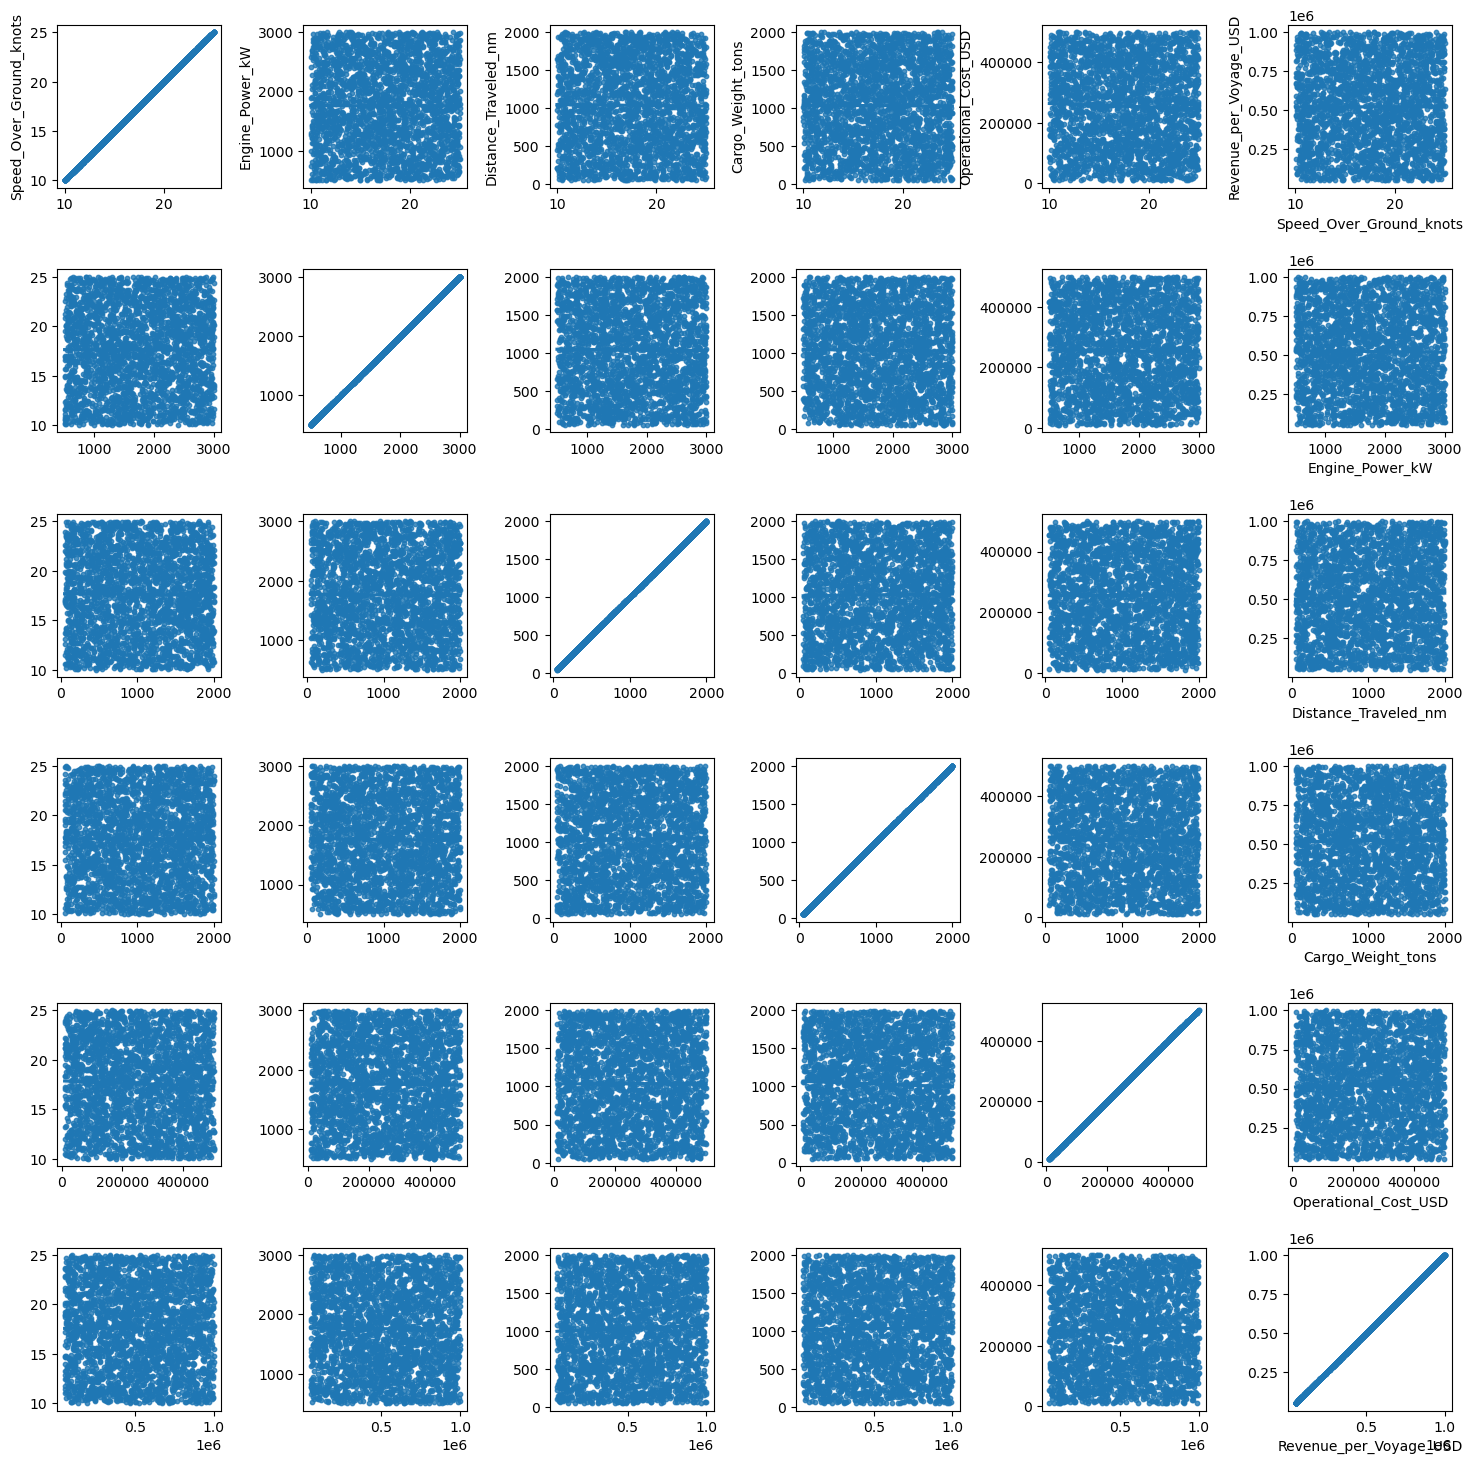

In [50]:
num_vars = ['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 
            'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']

plt.figure(1, figsize=(18, 18))
n = 0

for x in num_vars:
    for y in num_vars:
        n += 1
        plt.subplot(len(num_vars), len(num_vars), n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        sns.regplot(x=x, y=y, data=df, scatter_kws={'s': 10}) 
        plt.xlabel(x if y == num_vars[-1] else "") 
        plt.ylabel(y if x == num_vars[0] else "") 

plt.show()

Pairplot di atas menunjukkan hubungan antar variabel numerik dalam dataset, di mana sebagian besar scatter plot tidak menunjukkan pola yang jelas, mengindikasikan korelasi yang lemah.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Mengatasi Missing Values
Karena terdeteksi terdapat missing values, maka akan dilakukan imputasi missing values dengan menggunakan nilai modus pada fitur 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', dan 'Weather_Condition'.

In [51]:
mode_columns = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

for col in mode_columns:
    df[col].fillna(value=df[col].mode()[0], inplace=True)

In [52]:
df.isna().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

Setelah dilakukan imputasi missing values terlihat bahwa sudah tidak terdapat missing values pada seluruh fitur, sehingga dapat dilanjutkan pada analisis selanjutnya.

### Normalisasi Data
Untuk menyelaraskan fitur numerik maka akan dilakukan normalisasi data agar fitur data lebih seimbang.

In [53]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(numeric_df)
df_scaled = pd.DataFrame(df_scaled, columns=numeric_df.columns)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Akan dilakukan clustering dengan menggunakan algoritma KMEANS untuk mengelompokkan data sesuai dengan katakteristiknya.

**Menentukan Jumlah Cluster dengan Elbow Method**

Untuk menentukan jumlah cluster digunakan Elbow Method untuj mencari titik penurunan inertia melambat dan membentuk sudut siku. Dari analisis menggunakan metode ini, diperoleh output yang menunjukkan penurunan pada nilai k=3. (Note : pada k=2 cukup landai tetapi masih terlihat lengkungan jika dibandingkan dengan k=3)

In [54]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


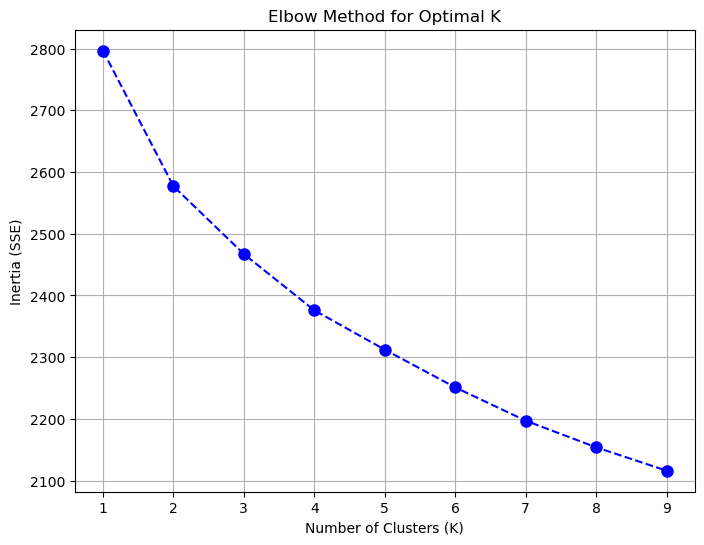

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b', markersize=8)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid(True)
plt.show()

**Melatih Model dengan KMEANS (k=3)**

In [56]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

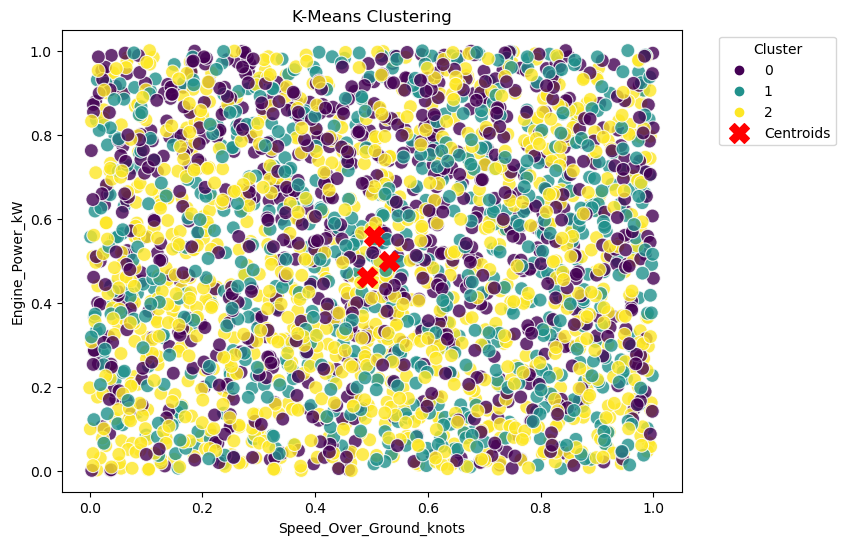

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Cluster'], palette='viridis', s=100, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.title('K-Means Clustering')

# Memindahkan legenda ke luar plot agar tidak tumpang tindih
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [58]:
silhouette_kmeans = silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster'])
print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")

Silhouette Score (K-Means): 0.0611


Melalui pelatihan model KMEANS dengan nilai k=3 diperoleh nilai silhouette score 0.0611. Karena nilai ini masih tergolong rendah dan mengindikasikan bahwa model belum optimal, maka selanjutnya akan dilakukan Feature Selection untuk meningkatkan kualitas model.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

**Principal Component Analysis (PCA)**

Digunakan metode PCA untuk mengurangi dimensionalitas dengan mentranformasi fitur ke dalam komponen utama yang lebih sedikit. Metode ini dipilih karena menghasilkan model yang lebih baik setelah dilakukan percobaan pada beberapa metode Feature Selection untuk Unsupervised Learning.

In [59]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled.drop(columns=['Cluster']))

pca_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_clusters = pca_kmeans.fit_predict(pca_data)

Selanjutnya, dilakukan evaluasi model dengan melihat nilai silhouette score setelah dilakukan PCA :

In [60]:
silhouette_pca = silhouette_score(pca_data, pca_clusters)
print(f"Silhouette Score (PCA + K-Means): {silhouette_pca:.4f}")

Silhouette Score (PCA + K-Means): 0.3641


Diperoleh nilai Silhouette Score setelah dilakukan PCA adalah 0.3641. Terdapat peningkatan nilai SIlhouette Score, oleh karena itu metode PCA dapat dikatakan berhasil meningkatkan kualitas model.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

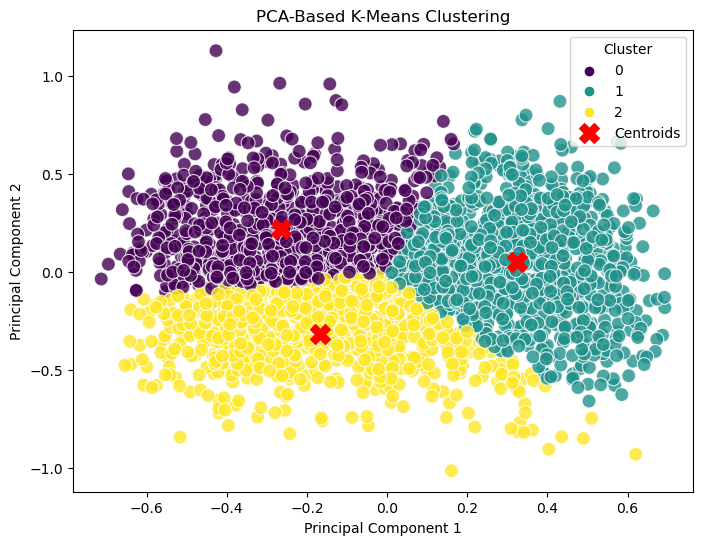

In [61]:
# Visualisasi PCA-Based Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis', s=100, alpha=0.8)
plt.scatter(pca_kmeans.cluster_centers_[:, 0], pca_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA-Based K-Means Clustering")
plt.legend(title="Cluster")
plt.show()


Visualisasi di atas menunjukkan hasil clustering K-Means dengan PCA, dengan data terbagi menjadi tiga klaster yang berbeda. Dari hasil ini, tampak bahwa setiap klaster memiliki batas yang cukup jelas, menunjukkan bahwa metode K-Means dengan PCA berhasil mengelompokkan data dengan baik berdasarkan pola yang ada.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [62]:
df_scaled['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [63]:
df_inverse = scaler.inverse_transform(df_scaled.drop(columns=['Cluster']))  
df_inverse = pd.DataFrame(df_inverse, columns=numeric_df.columns)  

In [64]:
df_cluster = df.copy()
df_cluster[numeric_df.columns] = df_inverse  
df_cluster['Cluster'] = df_scaled['Cluster']
df_cluster.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,2023-06-04,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,2
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,1
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,1
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,2
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

**Karakteristik Variabel Numerik**

In [65]:
df_cluster.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222,1.088816
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168,0.847281
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005,0.000000
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724,0.000000
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709,1.000000
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205,2.000000
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643,2.000000


**Karakteristik Variabel Kategorik**

In [66]:
categorical_columns = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition'] 
categorical_agg = df_cluster.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

print(categorical_agg)

            Ship_Type Route_Type Engine_Type Maintenance_Status  \
Cluster                                                           
0        Bulk Carrier  Long-haul      Diesel               Good   
1        Bulk Carrier  Long-haul      Diesel               Good   
2        Bulk Carrier  Long-haul      Diesel               Good   

        Weather_Condition  
Cluster                    
0                    Calm  
1                    Calm  
2                    Calm  


**Karakteristik Cluster**

In [67]:
numeric_cols = df_cluster.select_dtypes(exclude="O")
cluster_profiles = numeric_cols.groupby('Cluster').mean()

# Profiling untuk masing-masing cluster
cluster_0_profile = cluster_profiles.loc[0]
cluster_1_profile = cluster_profiles.loc[1]
cluster_2_profile = cluster_profiles.loc[2]

In [68]:
print(f"Cluster 0 Profile:\n{cluster_0_profile}\n")

Cluster 0 Profile:
Speed_Over_Ground_knots        17.577282
Engine_Power_kW              1894.476165
Distance_Traveled_nm         1155.751137
Draft_meters                   10.309072
Cargo_Weight_tons            1051.006554
Operational_Cost_USD       261203.782255
Revenue_per_Voyage_USD     544282.642316
Turnaround_Time_hours          26.235383
Efficiency_nm_per_kWh           0.808594
Seasonal_Impact_Score           1.024979
Weekly_Voyage_Count             6.582090
Average_Load_Percentage        73.590540
Name: 0, dtype: float64



In [69]:
print(f"Cluster 1 Profile:\n{cluster_1_profile}\n")

Cluster 1 Profile:
Speed_Over_Ground_knots        17.948480
Engine_Power_kW              1750.912349
Distance_Traveled_nm          953.187651
Draft_meters                    9.557065
Cargo_Weight_tons            1012.914584
Operational_Cost_USD       249127.012549
Revenue_per_Voyage_USD     495391.076418
Turnaround_Time_hours          57.988513
Efficiency_nm_per_kWh           0.787996
Seasonal_Impact_Score           0.979222
Weekly_Voyage_Count             6.837550
Average_Load_Percentage        76.876747
Name: 1, dtype: float64



In [70]:
print(f"Cluster 2 Profile:\n{cluster_2_profile}\n")

Cluster 2 Profile:
Speed_Over_Ground_knots        17.389868
Engine_Power_kW              1655.116352
Distance_Traveled_nm          999.195875
Draft_meters                    9.882825
Cargo_Weight_tons            1031.413725
Operational_Cost_USD       254460.780745
Revenue_per_Voyage_USD     520949.480984
Turnaround_Time_hours          42.927169
Efficiency_nm_per_kWh           0.798071
Seasonal_Impact_Score           1.003850
Weekly_Voyage_Count             2.315081
Average_Load_Percentage        75.375219
Name: 2, dtype: float64



# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- Rata-rata Speed Over Ground (knots): 17.58
- Rata-rata Engine Power (kW): 1894.48
- Rata-rata Distance Traveled (nm): 1155.75
- Rata-rata Draft (meters): 10.30
- Rata-rata Cargo Weight (tons): 1051.00
- Rata-rata Operational Cost (USD): 261,203.78
- Rata-rata Revenue per Voyage (USD): 544,282.64
- Rata-rata Turnaround Time (hours): 26.23
- Rata-rata Efficiency (nm per kWh): 0.80
- Rata-rata Seasonal Impact Score : 1.02
- Rata-rata Weekly Voyage Count: 6.58
- Rata-rata Average Load Percentage: 73.59

**Analisis:**
Cluster ini terdiri dari kapal dengan daya mesin yang lebih tinggi dan kecepatan operasional yang lebih tinggi dibandingkan cluster lainnya. Dengan biaya operasional yang lebih rendah dibanding Cluster 1, namun pendapatan per perjalanan tetap tinggi, kapal dalam cluster ini tampaknya lebih efisien dalam penggunaan bahan bakar dan waktu perjalanan. Karena nilai kecepatan tinggi, efesiensi bahan bakar cukup baik, biaya operasional rendah dan profit perjalanan yang tinggi maka cluster ini masuk kedalam kategori kapal **High Performance**.

## Cluster 1:
- Rata-rata Speed Over Ground (knots): 17.95
- Rata-rata Engine Power (kW): 1750.91
- Rata-rata Distance Traveled (nm): 953.19
- Rata-rata Draft (meters): 9.56
- Rata-rata Cargo Weight (tons): 1012.91
- Rata-rata Operational Cost (USD):  249,127.01
- Rata-rata Revenue per Voyage (USD): 495,391.08
- Rata-rata Turnaround Time (hours): 57.99
- Rata-rata Seasonal Impact Score : 0.98
- Rata-rata Efficiency (nm per kWh): 0.79
- Rata-rata Weekly Voyage Count: 6.84
- Rata-rata Average Load Percentage: 76.88

**Analisis:**
Cluster ini mencerminkan kapal-kapal dengan kecepatan rendah namun memiliki daya mesin yang tinggi dan biaya operasional terbesar di antara klaster lainnya. Meskipun pendapatan per perjalanan tidak terlalu signifikan, kapal dalam cluster ini menunjukkan tingkat efisiensi yang rendah, baik dari segi konsumsi bahan bakar maupun waktu penyelesaian perjalanan. Waktu tunggu yang lama serta frekuensi pelayaran mingguan yang tinggi mengindikasikan beban operasional yang besar tanpa kompensasi efisiensi yang memadai. Karena kombinasi antara daya mesin tinggi, efisiensi rendah, biaya besar, dan turnaround time yang panjang, maka cluster ini dikategorikan sebagai  **Low Performance**. 

## Cluster 2:
- Rata-rata Speed Over Ground (knots): 17.39
- Rata-rata Engine Power (kW): 1655.12
- Rata-rata Distance Traveled (nm): 999.20
- Rata-rata Draft (meters): 9.88
- Rata-rata Cargo Weight (tons): 1031.41
- Rata-rata Operational Cost (USD): 254,460.78
- Rata-rata Revenue per Voyage (USD): 520,949.48
- Rata-rata Turnaround Time (hours): 42.92
- Rata-rata Efficiency (nm per kWh): 0.80
- Rata-rata Seasonal Impact Score : 1.00
- Rata-rata Weekly Voyage Count: 2.31
- Rata-rata Average Load Percentage: 75.38

**Analisis:**
Cluster ini terdiri dari kapal-kapal dengan kecepatan cukup tinggi namun daya mesin yang lebih rendah, sehingga memberikan keseimbangan yang baik antara performa dan efisiensi energi. Biaya operasional relatif lebih rendah dibanding Cluster 1, sementara pendapatan per perjalanan justru lebih tinggi. Hal ini menunjukkan bahwa kapal dalam cluster ini mampu menyelesaikan perjalanan dengan lebih efisien dalam hal waktu dan konsumsi bahan bakar. Meskipun frekuensi pelayaran mingguannya rendah, profit per perjalanan dan efisiensi operasional secara keseluruhan cukup baik. Dengan kombinasi performa yang stabil dan efisiensi yang mendekati optimal, cluster ini masuk dalam kategori **Moderate Performance**.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [71]:
df_cluster.rename(columns={'Cluster': 'Ship_Performance'}, inplace=True)

performance_mapping = {0: 'High', 1: 'Low', 2: 'Moderate'}
df_cluster['Ship_Performance'] = df_cluster['Ship_Performance'].map(performance_mapping)

df_cluster.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Performance
0,2023-06-04,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1.0,93.769249,Moderate
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6.0,93.895372,Low
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9.0,96.218244,Low
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1.0,66.193698,Moderate
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8.0,80.008581,Low


In [72]:
df_cluster.to_csv('df_clustered.csv', index=False)